In [93]:
import tweepy
import numpy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

from api_keys import twitter_api, twitter_api_secret, access_token, access_token_secret


In [94]:
auth = tweepy.OAuthHandler(twitter_api, twitter_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [95]:
target_users = ["BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

results_list = []

username = []
tweet_date = []
tweet_text = []
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
tweets_ago = []
    
        
for user in target_users:
        
    public_tweets = api.user_timeline(user, count=100)
        
    count = 1
        
    for tweet in public_tweets:
            
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        positive = results["pos"]
        neutral = results["neu"]
        negative = results["neg"]
            
        username.append(tweet["user"]["screen_name"])
        tweet_date.append(tweet["created_at"])
        tweet_text.append(tweet["text"])
        compound_list.append(compound)
        positive_list.append(positive)
        neutral_list.append(neutral)
        negative_list.append(negative)
        tweets_ago.append(count)
            
        count += 1
        
        
news_tweets_df = pd.DataFrame({"Username": username,
                              "Date": tweet_date,
                              "Text": tweet_text,
                              "Compound Score": compound_list,
                              "Positive Score": positive_list,
                              "Neutral Score": neutral_list,
                              "Negative Score": negative_list,
                              "Tweets Ago": tweets_ago})
            
            
            

In [96]:
news_tweets_df = news_tweets_df[["Username", "Date", "Text", 
                                 "Compound Score", "Negative Score", 
                                 "Neutral Score", "Positive Score", "Tweets Ago"]]
news_tweets_df.head(500)

news_tweets_df.to_csv("News Tweets.csv")

In [97]:
len(news_tweets_df)

500

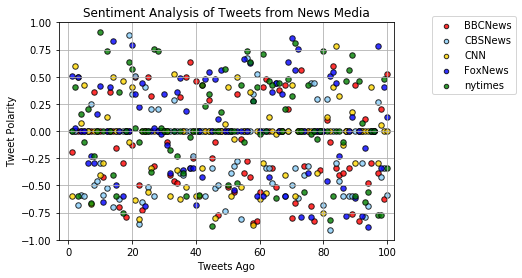

In [119]:
#Create plot
fig, ax = plt.subplots()
#x_vals = news_tweets_df["Tweets Ago"]
#y_vals = news_tweets_df["Compound Score"]
#color_group = news_tweets_df.groupby("Username")
#plt.scatter(x_vals,
        # y_vals, marker="o",
        # alpha=0.8)
        
groups = news_tweets_df.groupby('Username')
colors = ["r", "lightskyblue", "gold", "b", "g"]
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter', x='Tweets Ago', y='Compound Score', ylim=((-1.0, 1.0)), xlim=((105, -2)), s=30, label=name, ax=ax, color=colors[i], edgecolor="black", alpha=.8)
lgd = ax.legend(numpoints=1, bbox_to_anchor=(1.1, 1.05))
for handle in lgd.legendHandles:
    handle.set_sizes([20.0])
ax.set_ylim((-1.0, 1.0))
ax.set_xlim((-3, 102))

#Incorporate the other graph properties
plt.grid()
plt.title(f"Sentiment Analysis of Tweets from News Media")
#plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()